# Q1

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, binom

In [13]:
df = pd.read_csv('Tarbiat.csv')
df

,metro,BRT
0,6,2
1,4,1
2,2,2
3,3,3
4,6,1
...,...,...
9995,2,3
9996,2,3
9997,7,3
9998,3,0


In [14]:
df['BRT'].value_counts()

BRT
2     2674
1     2643
3     1908
0     1259
4      929
5      394
6      144
7       30
8       13
9        3
10       3
Name: count, dtype: int64

In [15]:
df['metro'].value_counts()

metro
3     2152
4     1880
2     1861
5     1317
1     1031
6      738
7      443
0      292
8      162
9       83
10      29
11       6
12       4
13       2
Name: count, dtype: int64

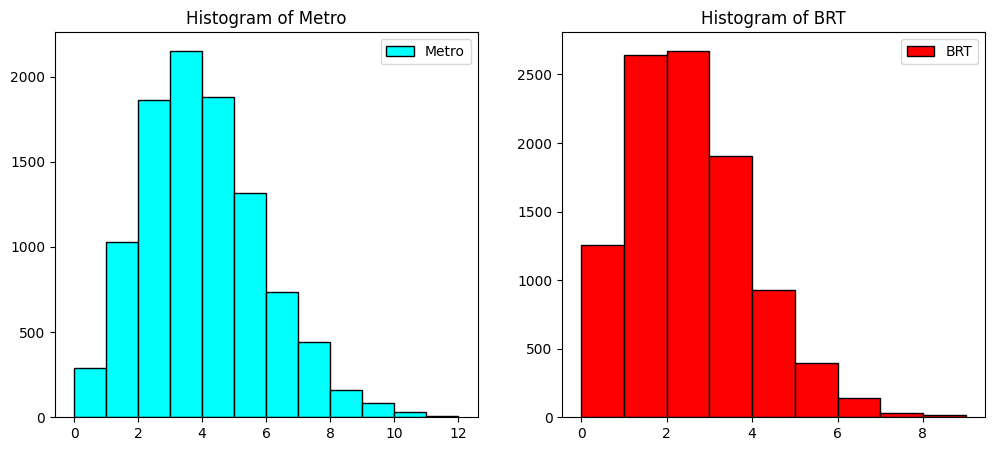

In [16]:
# 1.
plt.figure(figsize=(12, 5))

bins_range_metro = range(min(df['metro']), max(df['metro']))
plt.subplot(1, 2, 1)
plt.hist(df['metro'], bins=bins_range_metro, edgecolor='black', label='Metro', color="cyan")
plt.title('Histogram of Metro')
plt.legend()

bins_range_BRT = range(min(df['BRT']), max(df['BRT']))
plt.subplot(1, 2, 2)
plt.hist(df['BRT'], bins=bins_range_BRT, edgecolor='black', label='BRT', color="red")
plt.title('Histogram of BRT')
plt.legend()

plt.show()

In [17]:
# 2.
lambda_X = df['metro'].mean()
lambda_Y = df['BRT'].mean()
print(lambda_X, lambda_Y)

3.5316 2.0636


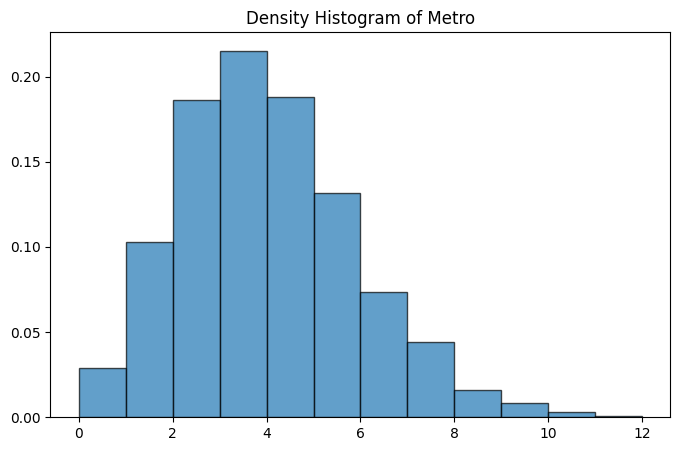

In [18]:
# 3
plt.figure(figsize=(8, 5))
plt.hist(df['metro'], bins=range(min(df['metro']), max(df['metro'])), density=True, edgecolor='black', alpha=0.7)
plt.title('Density Histogram of Metro')
plt.show()

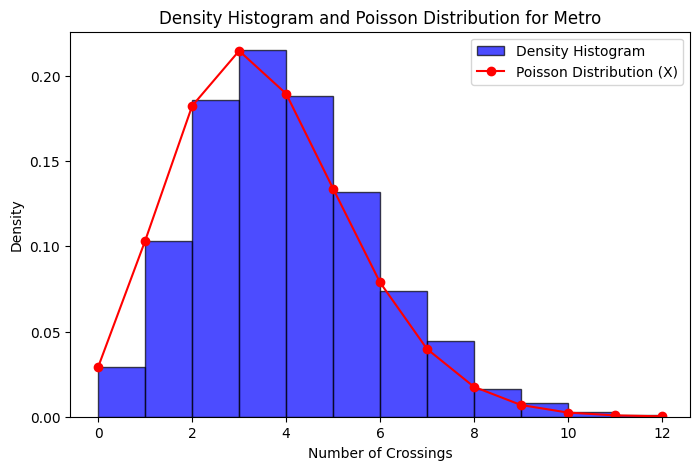

In [19]:
# 4.
x_values = np.arange(min(df['metro']), max(df['metro']))
plt.figure(figsize=(8, 5))
plt.hist(df['metro'], bins=range(min(df['metro']), max(df['metro'])), density=True, edgecolor='black', alpha=0.7, label='Density Histogram', color='blue')
plt.plot(x_values, poisson.pmf(x_values, lambda_X), 'ro-', label='Poisson Distribution (X)')
plt.title('Density Histogram and Poisson Distribution for Metro')
plt.xlabel('Number of Crossings')
plt.ylabel('Density')
plt.legend()
plt.show()

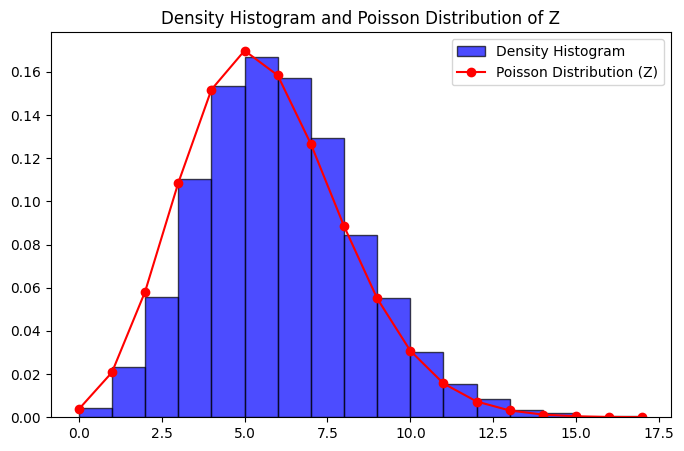

In [20]:
# 5.
df['Z'] = df['BRT'] + df['metro']
lambda_Z = df['Z'].mean()
z_values = np.arange(min(df['Z']), max(df['Z']))
bins_range_z = range(min(df['Z']), max(df['Z']))

plt.figure(figsize=(8, 5))
plt.hist(df['Z'], bins=bins_range_z, density=True, edgecolor='black', alpha=0.7, label='Density Histogram', color='blue')
plt.plot(z_values, poisson.pmf(z_values, lambda_Z), 'ro-', label='Poisson Distribution (Z)')
plt.title('Density Histogram and Poisson Distribution of Z')
plt.legend()
plt.show()

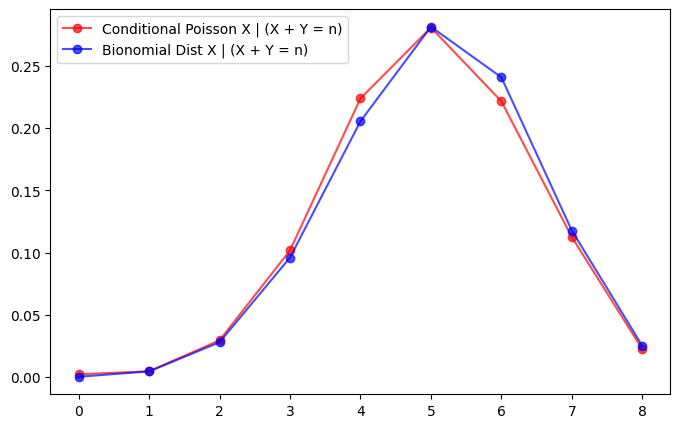

In [21]:
# 7-8
lambda_metro = df['metro'].mean()
lambda_BRT = df['BRT'].mean()
n = 8

pmf_X_conditional = []
df_sum_8 = df[df['metro'] + df['BRT'] == n]

for k in range(n + 1):
    count_k = len(df_sum_8[df_sum_8['metro'] == k])
    pmf_X_conditional.append(count_k / len(df_sum_8))


p_metro = lambda_metro / (lambda_metro + lambda_BRT)
pmf_binomial = [binom.pmf(k, n, p_metro) for k in range(n + 1)]


plt.figure(figsize=(8, 5))
plt.plot(np.arange(n + 1), pmf_X_conditional, 'ro-', label='Conditional Poisson X | (X + Y = n)', alpha=0.7)
plt.plot(np.arange(n + 1), pmf_binomial, 'bo-', label='Bionomial Dist X | (X + Y = n)', alpha=0.7)
plt.legend()
plt.show()


# Q2

In [22]:
# 1-2
import numpy as np

def coupon_collector(n, k):
    results = []
    
    for _ in range(k):
        collected_types = set()
        trials = 0
        
        while len(collected_types) < n:
            coupon = np.random.randint(1, n + 1)
            collected_types.add(coupon)
            trials += 1
        
        results.append(trials)
    return np.mean(results)

n = 10
k_values = [10000, 100000]

for k in k_values:
    res = coupon_collector(n, k)
    print(res)

29.2541
29.30439


In [23]:
# .3-4-5
import sympy

s = sympy.symbols('s')

def moment_generating_function_maker(p):
    return (p * sympy.exp(s)) / (1 - (1 - p) * sympy.exp(s))

Xi = []
n = 10
p = 0
for i in range(1, n + 1):
    p = i / n
    res = moment_generating_function_maker(p)
    Xi.append(res)
    
# .4    
Qx_T = 1
for i in Xi:
    Qx_T *= i


# .5
deriv = sympy.diff(Qx_T, s)
Ex_T = deriv.subs({s:0})
print(Ex_T)

29.2896825396826


# Q3

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data_frame = pd.read_csv('digits.csv')
data_frame.value_counts()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pix

In [26]:
# 1-2
row_201 = data_frame.loc[200].copy()
row_202 = data_frame.loc[201].copy()

data_frame = data_frame.drop([200, 201])

df = pd.read_csv('digits.csv')

threshold = 128
df.iloc[:, 1:] = (df.iloc[:, 1:] >= threshold).astype(int)

df.to_csv('digits_modified_binary.csv', index=False)

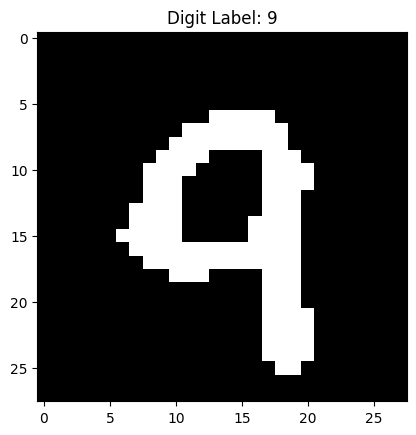

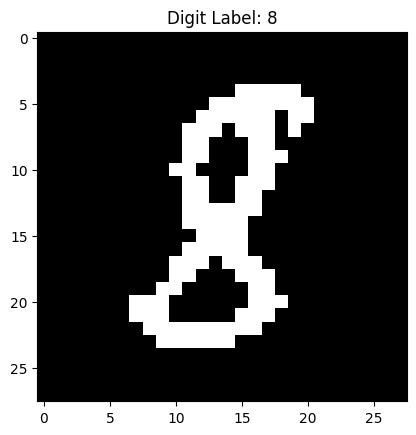

In [27]:
# 3
df_modified = pd.read_csv('digits_modified_binary.csv')

chosen_label_row_nine = 180
chosen_label_row_eight = 45

chosen_row_nine = df_modified.iloc[chosen_label_row_nine, 1:].values
chosen_row_eight = df_modified.iloc[chosen_label_row_eight, 1:].values

image_array_nine = np.reshape(chosen_row_nine, (28, 28))
image_array_eight = np.reshape(chosen_row_eight, (28, 28))

plt.imshow(image_array_nine, cmap='gray')
plt.title(f"Digit Label: {df_modified.iloc[chosen_label_row_nine, 0]}")
plt.show()
plt.imshow(image_array_eight, cmap='gray')
plt.title(f"Digit Label: {df_modified.iloc[chosen_label_row_eight, 0]}")
plt.show()

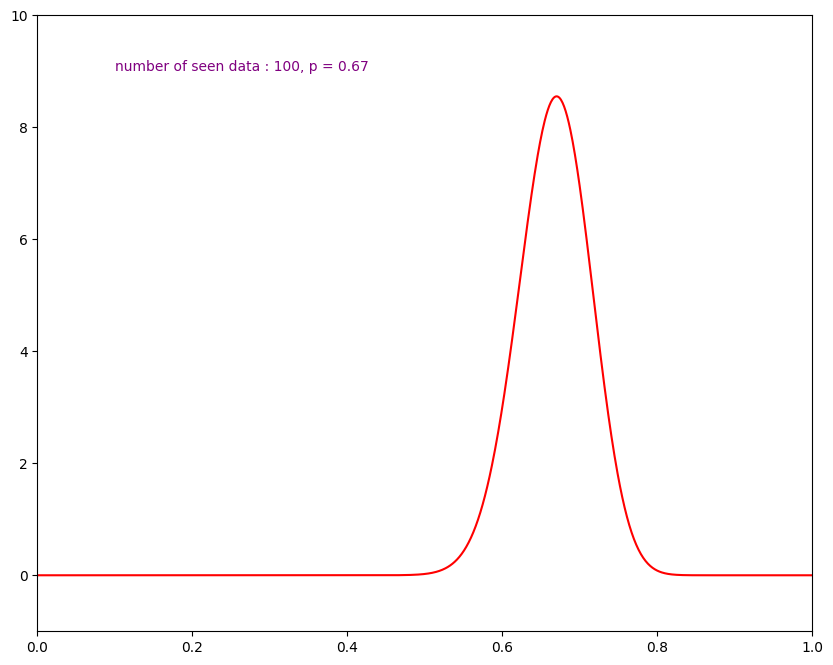

<Figure size 1000x800 with 0 Axes>

In [28]:
# 4
## you need these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display

t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

df = pd.read_csv('digits_modified_binary.csv')

def update(fy: np.array, n: bool) -> np.array:
    pny = stats.bernoulli.pmf(n, p)
    integral = np.sum(fy * pny) / t
    post = fy * pny / integral
    return post


plt.figure(figsize=(10,8))
for i in range(100):
    # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
    n =  df[df['label'] == 8].iloc[i, df.columns.get_loc('pixel404')]
    fy = update(fy, n)

    # dynamic plot
    # do not change this part
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)